In [4]:
import pyexiv2
from os import walk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
freq_dict = {}

# Adiciona a palavra no frequency dictionary
def add_word(word):
    if word.lower() in freq_dict:
        freq_dict[word.lower()] += 1
    else:
        freq_dict[word.lower()] = 1

dir_path = "D:\\NewCategorization\\Categorized"

# Le todos os arquivos da pasta que eu especifiquei
files = []
for (dirpath, dirnames, filenames) in walk(dir_path):
    files.extend(filenames)
    break

for filename in files:  
    with open(dir_path + "\\" + filename, 'rb+') as file:
        with pyexiv2.ImageData(file.read()) as img:
            metadata = img.read_xmp()
            if 'Xmp.dc.subject' in metadata:
                for tag in metadata['Xmp.dc.subject']:
                    add_word(tag)

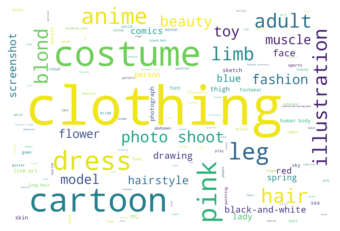

In [23]:
wordcloud = WordCloud(width=1500,height=1000, max_words=1628,normalize_plurals=False, background_color="white")  .generate_from_frequencies(freq_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()